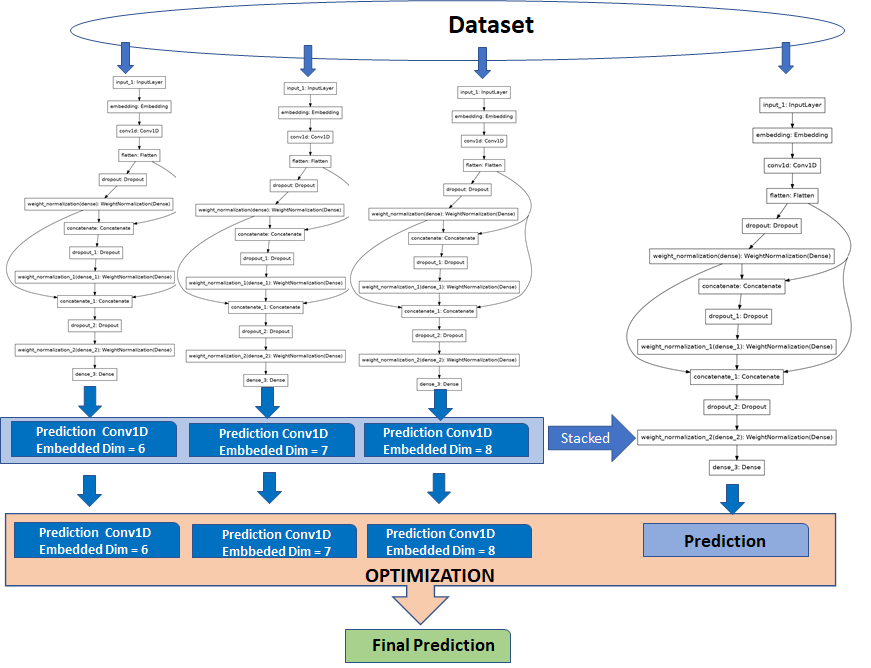

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.feature_selection import mutual_info_classif

import gc

import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras.backend as K
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations,callbacks
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import initializers

from keras.models import Model


In [2]:
train = pd.read_csv('../input/tabular-playground-series-jun-2021/train.csv')
test = pd.read_csv("../input/tabular-playground-series-jun-2021/test.csv")
submission = pd.read_csv("../input/tabular-playground-series-jun-2021/sample_submission.csv")
submission = submission.set_index('id')


In [3]:
targets = pd.get_dummies(train['target'])
dic = {'Class_1':1,'Class_2':2,'Class_3':3,'Class_4':4,'Class_5':5,'Class_6':6,'Class_7':7,'Class_8':8,'Class_9':9}
target_num = train["target"].map(dic)

In [4]:
def custom_metric(y_true, y_pred):
    y_pred = K.clip(y_pred, 1e-15, 1-1e-15)
    loss = K.mean(cce(y_true, y_pred))
    return loss

cce = tf.keras.losses.CategoricalCrossentropy()

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_custom_metric', min_delta=1e-05, patience=4, verbose=0,
    mode='min', baseline=None, restore_best_weights=True)

plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_custom_metric', factor=0.7, patience=2, verbose=0,
    mode='min')

In [5]:
def conv_model1():

    conv_inputs = layers.Input(shape = (75))
    embed = layers.Embedding (input_dim = 354, 
                              output_dim = 6,
                              embeddings_regularizer='l2')(conv_inputs)
    embed = layers.Conv1D(12,1,activation = 'relu')(embed)        
    embed = layers.Flatten()(embed)
    hidden = layers.Dropout(0.3)(embed)
    
    hidden = tfa.layers.WeightNormalization(
                layers.Dense(
                units=32,
                activation ='selu',
                kernel_initializer = "lecun_normal"))(hidden)
    
    output = layers.Dropout(0.3)(layers.Concatenate()([embed, hidden]))
    output = tfa.layers.WeightNormalization(
    layers.Dense(
                units = 32,
                activation='relu',
                kernel_initializer = "lecun_normal"))(output) 
    output = layers.Dropout(0.4)(layers.Concatenate()([embed, hidden, output]))
    output = tfa.layers.WeightNormalization(
    layers.Dense(
                units = 32, 
                activation = 'relu',
                kernel_initializer = "lecun_normal"))(output)
    
    conv_outputs = layers.Dense(
                units = 9, 
                activation ='softmax',
                kernel_initializer ="lecun_normal")(output)
    
    model = Model(conv_inputs,conv_outputs)
    
    return model

In [6]:
def conv_model2():

   
    conv_inputs = layers.Input(shape = (75))
    embed = layers.Embedding (input_dim = 354, 
                              output_dim = 7,
                              embeddings_regularizer='l2')(conv_inputs)
    embed = layers.Conv1D(12,1,activation = 'relu')(embed)        
    embed = layers.Flatten()(embed)
    hidden = layers.Dropout(0.3)(embed)
    
    hidden = tfa.layers.WeightNormalization(
                layers.Dense(
                units=32,
                activation ='selu',
                kernel_initializer = "lecun_normal"))(hidden)
    
    output = layers.Dropout(0.3)(layers.Concatenate()([embed, hidden]))
    output = tfa.layers.WeightNormalization(
    layers.Dense(
                units = 32,
                activation='relu',
                kernel_initializer = "lecun_normal"))(output) 
    output = layers.Dropout(0.4)(layers.Concatenate()([embed, hidden, output]))
    output = tfa.layers.WeightNormalization(
    layers.Dense(
                units = 32, 
                activation = 'relu',
                kernel_initializer = "lecun_normal"))(output)
    
    conv_outputs = layers.Dense(
                units = 9, 
                activation ='softmax',
                kernel_initializer ="lecun_normal")(output)
    
    model = Model(conv_inputs,conv_outputs)
    
    return model

In [7]:
def conv_model3():

   
    conv_inputs = layers.Input(shape = (75))
    embed = layers.Embedding (input_dim = 354, 
                              output_dim = 8,
                              embeddings_regularizer='l2')(conv_inputs)
    embed = layers.Conv1D(12,1,activation = 'relu')(embed)        
    embed = layers.Flatten()(embed)
    hidden = layers.Dropout(0.3)(embed)
    
    hidden = tfa.layers.WeightNormalization(
                layers.Dense(
                units=32,
                activation ='selu',
                kernel_initializer = "lecun_normal"))(hidden)
    
    output = layers.Dropout(0.3)(layers.Concatenate()([embed, hidden]))
    output = tfa.layers.WeightNormalization(
    layers.Dense(
                units = 32,
                activation='relu',
                kernel_initializer = "lecun_normal"))(output) 
    output = layers.Dropout(0.4)(layers.Concatenate()([embed, output]))
    output = tfa.layers.WeightNormalization(
    layers.Dense(
                units = 32, 
                activation = 'relu',
                kernel_initializer = "lecun_normal"))(output)
    
    conv_outputs = layers.Dense(
                units = 9, 
                activation ='softmax',
                kernel_initializer ="lecun_normal")(output)
    
    model = Model(conv_inputs,conv_outputs)
    
    return model

In [8]:
def classifier():

   
    class_inputs = layers.Input(shape = (75))
    pred_inputs = layers.Input(shape = (27))
    embed = layers.Embedding (input_dim = 354, 
                              output_dim = 7,
                              embeddings_regularizer='l2')(class_inputs)
    embed = layers.Conv1D(12,1,activation = 'relu')(embed)        
    embed = layers.Flatten()(embed)
    hidden = layers.Dropout(0.3)(embed)
    
    hidden = tfa.layers.WeightNormalization(
                layers.Dense(
                units=32,
                activation ='selu',
                kernel_initializer = "lecun_normal"))(hidden)
    
    output = layers.Dropout(0.3)(layers.Concatenate()([embed, hidden]))
    output = tfa.layers.WeightNormalization(
    layers.Dense(
                units = 32,
                activation='relu',
                kernel_initializer = "lecun_normal"))(output) 
    output = layers.Dropout(0.4)(layers.Concatenate()([embed, output]))
    output = tfa.layers.WeightNormalization(
    layers.Dense(
                units = 32, 
                activation = 'relu',
                kernel_initializer = "lecun_normal"))(output)
    
    output = layers.Concatenate()([output,pred_inputs])
    
    class_outputs = layers.Dense(
                units = 9, 
                activation ='softmax',
                kernel_initializer ="lecun_normal")(output)
    
    model = Model([class_inputs,pred_inputs],class_outputs)
    
    return model

In [ ]:
y_valids = []

oof_NN_class = np.zeros((train.shape[0],9))
pred_NN_class = np.zeros((test.shape[0],9))
pred_NN_class_all = np.zeros((test.shape[0],9))

oof_NN_a = np.zeros((train.shape[0],9))
pred_NN_a = np.zeros((test.shape[0],9))
pred_NN_a_all = np.zeros((test.shape[0],9))

oof_NN_h = np.zeros((train.shape[0],9))
pred_NN_h = np.zeros((test.shape[0],9))
pred_NN_h_all = np.zeros((test.shape[0],9))

oof_NN_v = np.zeros((train.shape[0],9))
pred_NN_v = np.zeros((test.shape[0],9))
pred_NN_v_all = np.zeros((test.shape[0],9))

NN_c_train_preds = []
NN_c_test_preds = []

NN_h_train_preds = []
NN_h_test_preds = []

NN_v_train_preds = []
NN_v_test_preds = []

NN_a_train_preds = []
NN_a_test_preds = []

N_FOLDS = 25
SEED = 42
EPOCH = 50
N_round = 1

for i in range(N_round ):
    
    
    skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state= SEED * i)
    
    print(f"\n =========== ROUND {i+1} ===============\n")
    
    for fold, (tr_idx, ts_idx) in enumerate(skf.split(train,train.iloc[:,-1])):
        print(f"\n--------TRAINING FOLD {fold} ---------\n")

        X_train = train.iloc[:,1:-1].iloc[tr_idx]
        y_train = targets.iloc[tr_idx]
        X_test = train.iloc[:,1:-1].iloc[ts_idx]
        y_test = targets.iloc[ts_idx]

        K.clear_session()

        #================= NN CONV MODEL training =========

        model_conv = conv_model1()

        model_conv.compile(loss='categorical_crossentropy', 
                                optimizer = keras.optimizers.Adam(learning_rate=2e-4), 
                                metrics=custom_metric)
        model_conv.fit(X_train, y_train,
                  batch_size = 256, epochs = EPOCH,
                  validation_data=(X_test, y_test),
                  callbacks=[es, plateau],
                  verbose = 0)

        #============== Convolution Model prediction ==========

        pred_a = model_conv.predict(X_test)
        pred_a1 = model_conv.predict(X_train)
        oof_NN_a[ts_idx] += pred_a 
        score_NN_a = log_loss(y_test, pred_a)
        print(f"Score Model 1: {score_NN_a}")
        pred_NN_a += model_conv.predict(test.iloc[:,1:]) / N_FOLDS
        pred_NN_a_all += model_conv.predict(test.iloc[:,1:]) / N_FOLDS / N_round

        #================= By column MODELS training ==================

        model_by_col = conv_model2()

        model_by_col.compile(loss='categorical_crossentropy', 
                             optimizer = keras.optimizers.Adam(learning_rate=2e-4), 
                             metrics=custom_metric)

        model_by_col.fit(X_train,y_train,
                validation_data=(X_test,y_test),
                epochs=EPOCH,
                verbose=0,
                batch_size = 256,
                callbacks=[es,plateau])

        #============= By column NN Model prediction =============

        pred_col = model_by_col.predict(X_test)
        pred_col1 = model_by_col.predict(X_train)
        oof_NN_v[ts_idx] = pred_col 
        score_NN_v = log_loss(y_test,  pred_col)
        print(f"Score Model 2: {score_NN_v}")
        pred_NN_v += model_by_col.predict(test.iloc[:,1:]) / N_FOLDS
        pred_NN_v_all += model_by_col.predict(test.iloc[:,1:]) / N_FOLDS / N_round    

        #================= By row MODELS training ==================

        model_by_r = conv_model3()

        model_by_r.compile(loss='categorical_crossentropy', 
                            optimizer = keras.optimizers.Adam(learning_rate=2e-4), 
                            metrics=custom_metric)

        model_by_r.fit(X_train,y_train,
                validation_data=(X_test,y_test),
                epochs=EPOCH,
                verbose=0,
                batch_size = 256,
                callbacks=[es,plateau])

         #============= By row NN Model prediction =============

        pred_row = model_by_r.predict(X_test)
        pred_row1 = model_by_r.predict(X_train)
        oof_NN_h[ts_idx] = pred_row 
        score_NN_h = log_loss(y_test, pred_row)
        print(f"Score Model 3: {score_NN_h}")
        pred_NN_h += model_by_r.predict(test.iloc[:,1:]) / N_FOLDS
        pred_NN_h_all += model_by_r.predict(test.iloc[:,1:]) / N_FOLDS / N_round 
        
        #==================== Classifier =========================
        
        concat_train = np.hstack((pred_a1,pred_col1,pred_row1))
        concat_test = np.hstack((pred_a,pred_col,pred_row))
        concat_test_final = np.hstack((model_conv.predict(test.iloc[:,1:]),
                                  model_by_col.predict(test.iloc[:,1:]),
                                  model_by_r.predict(test.iloc[:,1:])))
        
        model_class = classifier()

        model_class.compile(loss='categorical_crossentropy', 
                            optimizer = keras.optimizers.Adam(learning_rate=2e-4), 
                            metrics=custom_metric)

        model_class.fit([X_train,concat_train],y_train,
                validation_data=([X_test,concat_test],y_test),
                epochs=EPOCH,
                verbose=0,
                batch_size = 256,
                callbacks=[es,plateau])
        
        pred_class = model_class.predict([X_test,concat_test])
        oof_NN_class[ts_idx] = pred_class
        score_NN_class = log_loss(y_test, pred_class)
        print(f"Score Model classifier: {score_NN_class}")
        pred_NN_class += model_class.predict([test.iloc[:,1:],concat_test_final]) / N_FOLDS
        pred_NN_class_all += model_class.predict([test.iloc[:,1:],concat_test_final]) / N_FOLDS / N_round 

        # =========PREPROCESSING FOR FUTURE OPTIMIZATION===========
        
        y_valid = target_num.iloc[ts_idx]
        y_valids.append(y_valid)

        NN_c_train_preds.append(pred_class)
        NN_c_test_preds.append(model_class.predict([test.iloc[:,1:],concat_test_final]))
        
        NN_a_train_preds.append(pred_a)
        NN_a_test_preds.append(model_conv.predict(test.iloc[:,1:]))

        NN_h_train_preds.append(pred_row)
        NN_h_test_preds.append(model_by_r.predict(test.iloc[:,1:]))

        NN_v_train_preds.append(pred_col)
        NN_v_test_preds.append(model_by_col.predict(test.iloc[:,1:]))
        #___________________________________________________________

    score_NN_h = log_loss(targets, oof_NN_h)
    print ("\n***************************************************")
    print(f" ROUND {i+1} FINAL SCORE MODEL 3 : {score_NN_h}") 
    score_NN_v = log_loss(targets, oof_NN_v)
    print(f"\n ROUND {i+1} FINAL SCORE MODEL 2 : {score_NN_v}")
    score_a = log_loss(targets, oof_NN_a)
    print(f"\n ROUND {i+1} FINAL SCORE MODEL 1 : {score_a}")
    score_NN_class = log_loss(targets, oof_NN_class)
    print(f"\n ROUND {i+1} FINAL SCORE CLASSIFIER : {score_NN_class}") 
    print ("\n***************************************************")


 =========== ROUND 1 ===============


--------TRAINING FOLD 0 ---------

Score Model 1: 1.7343352231557947
Score Model 2: 1.733156861984171
Score Model 3: 1.7341129034785554
Score Model classifier: 1.733033331738785

--------TRAINING FOLD 1 ---------

Score Model 1: 1.7388716636155732
Score Model 2: 1.736798540100921
Score Model 3: 1.7377045287494548
Score Model classifier: 1.737724642947316

--------TRAINING FOLD 2 ---------

Score Model 1: 1.7520060786283576
Score Model 2: 1.7499360182019883
Score Model 3: 1.7502403597710654
Score Model classifier: 1.7503566538053565

--------TRAINING FOLD 3 ---------

Score Model 1: 1.7564161050934344
Score Model 2: 1.7569883352899924
Score Model 3: 1.7563921337430366
Score Model classifier: 1.7578307778965683

--------TRAINING FOLD 4 ---------

Score Model 1: 1.7395430386741646


In [ ]:
from scipy.optimize import minimize
scores = []
weights = []
for y, NN_v_pred, NN_h_pred, NN_a_pred,NN_c_pred in zip(y_valids, 
                                        NN_v_train_preds, 
                                        NN_h_train_preds, 
                                        NN_a_train_preds,
                                        NN_c_train_preds                
                                        ):
    preds = []
    preds.append(NN_v_pred)
    preds.append(NN_h_pred)
    preds.append(NN_a_pred)
    preds.append(NN_c_pred)
    
    def log_weight_loss(weights):
        weighted_pred = ((weights[0]*preds[0]) + (weights[1]*preds[1]) + (weights[2]*preds[2]) + (weights[3]*preds[3]))
        return log_loss(y, weighted_pred)
    starting_values = [0.4]*len(preds) 
    cons = ({'type':'eq','fun':lambda w: 1-sum(w)})
    #bounds = [(0,1)]*len(preds) 
    res = minimize(log_weight_loss, 
                   starting_values, 
                   method='Nelder-Mead', 
                   #bounds=bounds, 
                   constraints=cons)
    
    weights.append(res['x'])
    scores.append(res['fun'])

In [ ]:
results = pd.DataFrame(weights, columns =['Model 2','Model 3','Model 1','Classifier'])
results['better model'] = results.idxmax(axis=1, skipna=True)
results ['max_value'] = results.max(axis=1)
results['scores'] = scores
display(results)

In [ ]:
results.groupby(['better model'])['max_value'].count()

In [ ]:
folds = N_FOLDS
final_weights = sum(weights)/(folds * N_round)
weighted_preds = np.array((final_weights[0] * sum(np.array(NN_v_test_preds)/(folds * N_round)))
                           +(final_weights[1] * sum(np.array(NN_h_test_preds)/(folds * N_round)))
                           +(final_weights[2] * sum(np.array(NN_a_test_preds)/(folds * N_round)))
                           +(final_weights[3] * sum(np.array(NN_c_test_preds)/(folds * N_round))))

In [ ]:
submission[['Class_1', 'Class_2', 'Class_3', 'Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']] = weighted_preds
submission.to_csv('weighted3.csv')

In [ ]:
submission[['Class_1', 'Class_2', 'Class_3', 'Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']] = pred_NN_class_all
submission.to_csv('classifier1.csv')